In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

#### DATASETS

In [46]:
#FOR GEOPANDAS
df_sped = pd.read_csv("schools_combined_SPED.csv")
provice_data = gpd.read_file('./Provinces/Provinces/Provinces.shp')

#FOR FOLIUM
geo_data= gpd.read_file('./phl_schp_deped/phl_schp_deped.shp')
geo_data["x"] = geo_data.geometry.centroid.x
geo_data["y"] = geo_data.geometry.centroid.y

<ipython-input-46-5fc7ce034a7b>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_data["x"] = geo_data.geometry.centroid.x
<ipython-input-46-5fc7ce034a7b>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_data["y"] = geo_data.geometry.centroid.y


#### GEOPANDAS HEATMAPS

In [47]:
df_sped

,Unnamed: 0,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,...,School ID_y,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,MOOE
0,1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,...,102193.0,13.0,3.0,0.0,0.0,0.0,2.0,12.0,4.0,275000.0
1,7,102252,Abanon Central School,Region I,Ilocos Region,PANGASINAN,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District IV,...,102252.0,24.0,0.0,0.0,0.0,0.0,4.0,22.0,1.0,440000.0
2,22,102226,Agdao Integrated School,Region I,Ilocos Region,PANGASINAN,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District II,...,102226.0,20.0,0.0,0.0,0.0,0.0,4.0,20.0,1.0,381000.0
3,24,101132,Agno CS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",AGNO,Agno,...,101132.0,23.0,0.0,0.0,0.0,0.0,6.0,18.0,1.0,392000.0
4,29,101149,Aguilar CS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",AGUILAR,Aguilar,...,101149.0,18.0,0.0,0.0,0.0,0.0,4.0,29.0,1.0,536000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,46535,319603,Philippine School for the Deaf,NCR,National Capital Region,NCR FOURTH DISTRICT,PASAY CITY,Pasay City,PASAY CITY,Pasay City West District,...,319603.0,25.0,0.0,0.0,0.0,0.0,0.0,4.0,89.0,3179000.0
1354,46547,305350,Quirino HS,NCR,National Capital Region,NCR SECOND DISTRICT,QUEZON CITY,Quezon City,QUEZON CITY,School District XIV,...,305350.0,68.0,0.0,0.0,0.0,0.0,22.0,121.0,5.0,3204000.0
1355,46554,305414,Sagad HS,NCR,National Capital Region,NCR SECOND DISTRICT,CITY OF PASIG,Pasig City,CITY OF PASIG,Pasig City District I,...,305414.0,39.0,0.0,0.0,0.0,0.0,7.0,53.0,1.0,2154000.0
1356,46571,305446,Sitero Francisco Mem. NHS,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,...,305446.0,16.0,0.0,0.0,0.0,0.0,3.0,39.0,0.0,1647000.0


In [48]:
provice_data.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949..."
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509..."
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211..."
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [49]:
print('SPED df:\n', sorted(df_sped["school.province"].unique()), '\n')
print('province df:\n', sorted(provice_data["PROVINCE"].unique()))

SPED df:
 ['ABRA', 'AGUSAN DEL NORTE', 'AGUSAN DEL SUR', 'AKLAN', 'ALBAY', 'ANTIQUE', 'APAYAO', 'AURORA', 'BATAAN', 'BATANES', 'BATANGAS', 'BENGUET', 'BILIRAN', 'BOHOL', 'BUKIDNON', 'BULACAN', 'CAGAYAN', 'CAMARINES NORTE', 'CAMARINES SUR', 'CAMIGUIN', 'CAPIZ', 'CATANDUANES', 'CAVITE', 'CEBU', 'CITY OF COTABATO', 'CITY OF ISABELA', 'COMPOSTELA VALLEY', 'DAVAO DEL NORTE', 'DAVAO DEL SUR', 'DAVAO ORIENTAL', 'DINAGAT ISLANDS', 'EASTERN SAMAR', 'GUIMARAS', 'IFUGAO', 'ILOCOS NORTE', 'ILOCOS SUR', 'ILOILO', 'ISABELA', 'KALINGA', 'LA UNION', 'LAGUNA', 'LANAO DEL NORTE', 'LANAO DEL SUR', 'LEYTE', 'MAGUINDANAO', 'MANILA, NCR, FIRST DISTRICT', 'MARINDUQUE', 'MASBATE', 'MISAMIS OCCIDENTAL', 'MISAMIS ORIENTAL', 'MOUNTAIN PROVINCE', 'NCR FOURTH DISTRICT', 'NCR SECOND DISTRICT', 'NCR THIRD DISTRICT', 'NEGROS OCCIDENTAL', 'NEGROS ORIENTAL', 'NORTH COTABATO', 'NORTHERN SAMAR', 'NUEVA ECIJA', 'NUEVA VIZCAYA', 'OCCIDENTAL MINDORO', 'ORIENTAL MINDORO', 'PALAWAN', 'PAMPANGA', 'PANGASINAN', 'QUEZON', 'QUIRI

In [50]:
province_dic = {'CITY OF COTABATO':'Maguindanao',
 'Manila, Ncr, First District':"Metropolitan Manila",
 'Ncr Fourth District':"Metropolitan Manila",
 'Ncr Second District':"Metropolitan Manila",
 'Ncr Third District':"Metropolitan Manila",
 'CITY OF ISABELA':"Basilan"}

In [51]:
df_sped["school.province"] = df_sped["school.province"].str.title().replace(province_dic).str.replace("Del", 'del')
df_sped.columns

Index(['Unnamed: 0', 'school.id', 'school.name', 'school.region',
       'school.region.name', 'school.province', 'school.cityhall',
       'school.division', 'school.citymuni', 'school.district',
       'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'School ID_x', 'Kinder Male',
       'Kinder Female', 'Grade 1 Male', 'Grade 1 Female', 'Grade 2 Male',
       'Grade 2 Female', 'Grade 3 Male', 'Grade 3 Female', 'Grade 4 Male',
       'Grade 4 Female', 'Grade 5 Male', 'Grade 5 Female', 'Grade 6 Male',
       'Grade 6 Female', 'SPED NG Male', 'SPED NG Female', 'Grade 7 Male',
       'Grade 7 Female', 'Grade 8 Male', 'Grade 8 Female', 'Grade 9 Male',
       'Grade 9 Female', 'Grade 10 Male', 'Grade 10 Female', 'Grade 11

In [52]:
sped_province = df_sped.groupby("school.province")["school.id"].nunique().reset_index()
sped_province

,school.province,school.id
0,Abra,1
1,Agusan del Norte,17
2,Agusan del Sur,22
3,Aklan,7
4,Albay,16
...,...,...
76,Western Samar,11
77,Zambales,30
78,Zamboanga Sibugay,12
79,Zamboanga del Norte,11


In [53]:
merged_data = pd.merge(provice_data,sped_province,left_on="PROVINCE",right_on="school.province",how ="left").fillna(0)
merged_data.sort_values("school.id",ascending=False).head(10)

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,school.province,school.id
46,177,PHL,Philippines,47,Metropolitan Manila,0,0,Lalawigan|Probinsya,Province,Metropolitan Manila,Metropolitan Manila,"MULTIPOLYGON (((120.97972 14.49306, 120.98000 ...",Metropolitan Manila,143.0
60,177,PHL,Philippines,61,Pangasinan,0,0,Lalawigan|Probinsya,Province,Pangasinan,Ilocos Region (Region I),"MULTIPOLYGON (((119.86505 15.81170, 119.86479 ...",Pangasinan,68.0
11,177,PHL,Philippines,12,Batangas,0,0,Lalawigan|Probinsya,Province,Batangas,CALABARZON (Region IV-A),"MULTIPOLYGON (((121.08528 13.57333, 121.08556 ...",Batangas,55.0
80,177,PHL,Philippines,81,Zamboanga del Sur,0,0,Lalawigan|Probinsya,Province,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",Zamboanga del Sur,54.0
61,177,PHL,Philippines,62,Quezon,0,0,Lalawigan|Probinsya,Province,Quezon,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ...",Quezon,52.0
24,177,PHL,Philippines,25,Cebu,0,0,Lalawigan|Probinsya,Province,Cebu,Central Visayas (Region VII),"MULTIPOLYGON (((123.38955 9.43467, 123.39031 9...",Cebu,52.0
51,177,PHL,Philippines,52,Negros Oriental,0,0,Lalawigan|Probinsya,Province,Negros Oriental,Central Visayas (Region VII),"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9...",Negros Oriental,43.0
35,177,PHL,Philippines,36,Iloilo,0,0,Lalawigan|Probinsya,Province,Iloilo,Western Visayas (Region VI),"MULTIPOLYGON (((122.77306 10.93785, 122.77243 ...",Iloilo,43.0
57,177,PHL,Philippines,58,Oriental Mindoro,0,0,Lalawigan|Probinsya,Province,Oriental Mindoro,MIMAROPA (Region IV-B),"MULTIPOLYGON (((121.43574 12.20257, 121.43555 ...",Oriental Mindoro,42.0
27,177,PHL,Philippines,28,Davao del Sur,0,0,Lalawigan|Probinsya,Province,Davao del Sur,Davao Region (Region XI),"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5...",Davao del Sur,35.0


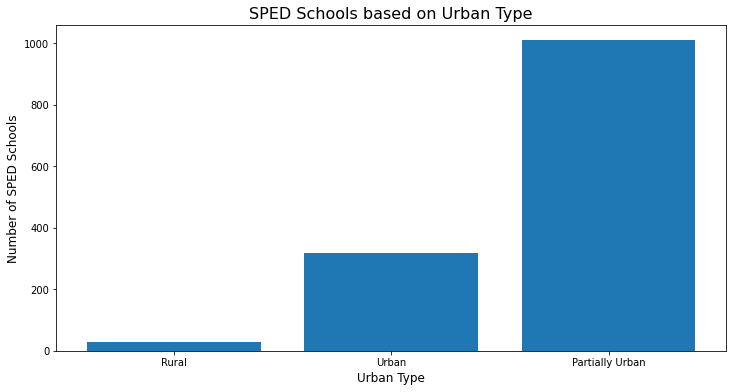

In [54]:
sped_dist = sped_corr.groupby("school.urban")["school.id"].nunique().sort_values()
# indicates if plotting on the figues or on subplots
#modify lang yung size ng graph mo.L,W format
plt.figure(figsize=(12,6)) 

# the main code to create the graph
plt.bar(sped_dist.index, sped_dist.values) 

# additional elements that can be customzed
plt.title("SPED Schools based on Urban Type", fontsize=16)
plt.ylabel("Number of SPED Schools", fontsize=12)
plt.xlabel("Urban Type", fontsize=12)
year = ['Rural','Urban','Partially Urban']
plt.xticks(range(len(sped_dist.index)), year)

# display graph
plt.show()

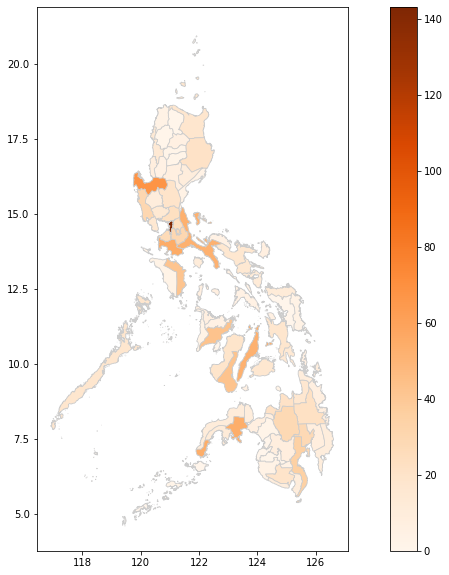

In [55]:
## OVERALL SPED

# set a variable that will call whatever column we want to visualise on the map
variable = 'school.id'
# set the range for the choropleth
vmin, vmax = merged_data["school.id"].min(), merged_data["school.id"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

In [56]:
## filling NA values
sped_corr=df_sped.fillna("Urban")
sped_corr.groupby("school.urban")["school.id"].nunique()


school.urban
Partially Urban    1009
Rural                30
Urban               319
Name: school.id, dtype: int64

In [57]:
sped_urban = sped_corr[sped_corr["school.urban"] =="Urban"]
sped_part_urban = sped_corr[sped_corr["school.urban"] =="Partially Urban"]
sped_rural = sped_corr[sped_corr["school.urban"] =="Rural"]

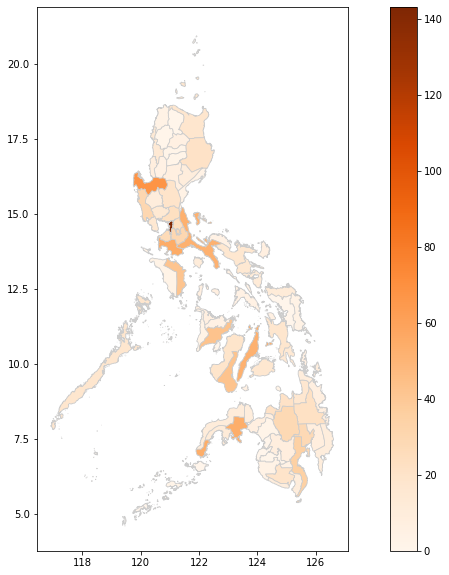

In [58]:
#SPED URBAN
sped_province_U = sped_urban.groupby("school.province")["school.id"].nunique().reset_index()
merged_data_U = pd.merge(provice_data,sped_province_U,left_on="PROVINCE",right_on="school.province",how ="left").fillna(0)

# set a variable that will call whatever column we want to visualise on the map
variable = 'school.id'
# set the range for the choropleth
vmin, vmax = merged_data_U["school.id"].min(), merged_data_U["school.id"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

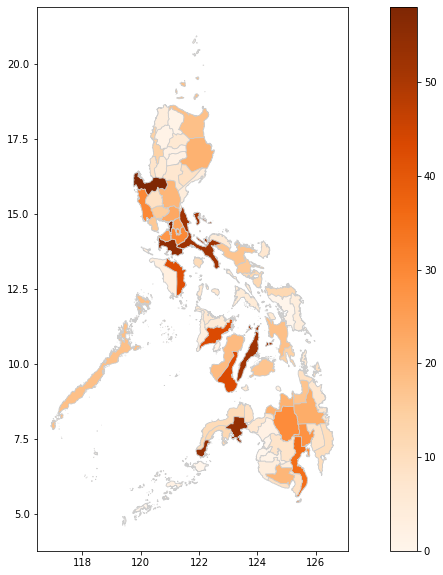

In [59]:
#SPED PARTIAL URBAN
sped_province_PU = sped_part_urban.groupby("school.province")["school.id"].nunique().reset_index()
merged_data_PU = pd.merge(provice_data,sped_province_PU,left_on="PROVINCE",right_on="school.province",how ="left").fillna(0)

# set a variable that will call whatever column we want to visualise on the map
variable = 'school.id'
# set the range for the choropleth
vmin, vmax = merged_data_PU["school.id"].min(), merged_data_PU["school.id"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

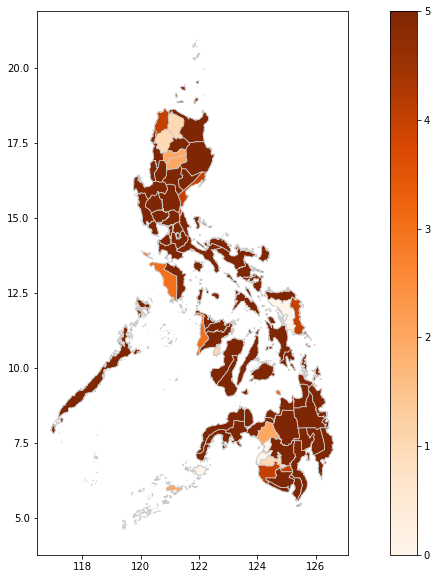

In [60]:
#SPED RURAL
sped_province_R = sped_rural.groupby("school.province")["school.id"].nunique().reset_index()
merged_data_R = pd.merge(provice_data,sped_province_R,left_on="PROVINCE",right_on="school.province",how ="left").fillna(0)

# set a variable that will call whatever column we want to visualise on the map
variable = 'school.id'
# set the range for the choropleth
vmin, vmax = merged_data_R["school.id"].min(), merged_data_R["school.id"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

#### FOLIUM

In [61]:
fol_sped = pd.merge(df_sped,geo_data,left_on="School ID_y", right_on = "ID",how ="left")
fol_sped

,Unnamed: 0,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,...,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,GPS_Source,geometry,x,y
0,1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,Ilocos Norte,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
1,7,102252,Abanon Central School,Region I,Ilocos Region,Pangasinan,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District IV,...,24.0,Blue,Abanon,PANGASINAN,San Carlos City District IV,School with no Annexes,GPS Pinning (2012),POINT Z (120.32827 15.86601 0.00000),120.328272,15.866006
2,22,102226,Agdao Integrated School,Region I,Ilocos Region,Pangasinan,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District II,...,21.0,Blue,Agdao,PANGASINAN,San Carlos City District II,School with no Annexes,GPS Pinning (2012),POINT Z (120.32322 15.89085 0.00000),120.323217,15.890847
3,24,101132,Agno CS,Region I,Ilocos Region,Pangasinan,PANGASINAN,"Pangasinan I, Lingayen",AGNO,Agno,...,24.0,Blue,POBLACION WEST,PANGASINAN,Agno,School with no Annexes,GPS Pinning (2009-10),POINT Z (119.79667 16.11833 0.00000),119.796667,16.118333
4,29,101149,Aguilar CS,Region I,Ilocos Region,Pangasinan,PANGASINAN,"Pangasinan I, Lingayen",AGUILAR,Aguilar,...,30.0,Blue,POBLACION,PANGASINAN,Aguilar,School with no Annexes,GPS Pinning (2009-10),POINT Z (120.23778 15.88528 0.00000),120.237778,15.885278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,46535,319603,Philippine School for the Deaf,NCR,National Capital Region,Metropolitan Manila,PASAY CITY,Pasay City,PASAY CITY,Pasay City West District,...,84.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99517 14.54214 0.00000),120.995169,14.542143
1358,46547,305350,Quirino HS,NCR,National Capital Region,Metropolitan Manila,QUEZON CITY,Quezon City,QUEZON CITY,School District XIV,...,74.0,Blue,"Project 3, Duyan Duyan",NCR SECOND DISTRICT,School District XIV,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.06618 14.63215 0.00000),121.066177,14.632148
1359,46554,305414,Sagad HS,NCR,National Capital Region,Metropolitan Manila,CITY OF PASIG,Pasig City,CITY OF PASIG,Pasig City District I,...,40.0,Red,Sagad,NCR SECOND DISTRICT,Pasig City District I,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.07972 14.56611 0.00000),121.079722,14.566111
1360,46571,305446,Sitero Francisco Mem. NHS,NCR,National Capital Region,Metropolitan Manila,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,...,16.0,Red,Ugong,NCR THIRD DISTRICT,Valenzuela City Central District,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.00667 14.68917 0.00000),121.006667,14.689167


In [62]:
fol_filtered = fol_sped[fol_sped['geometry'].notnull()]
fol_filtered

,Unnamed: 0,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,...,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,GPS_Source,geometry,x,y
1,7,102252,Abanon Central School,Region I,Ilocos Region,Pangasinan,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District IV,...,24.0,Blue,Abanon,PANGASINAN,San Carlos City District IV,School with no Annexes,GPS Pinning (2012),POINT Z (120.32827 15.86601 0.00000),120.328272,15.866006
2,22,102226,Agdao Integrated School,Region I,Ilocos Region,Pangasinan,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District II,...,21.0,Blue,Agdao,PANGASINAN,San Carlos City District II,School with no Annexes,GPS Pinning (2012),POINT Z (120.32322 15.89085 0.00000),120.323217,15.890847
3,24,101132,Agno CS,Region I,Ilocos Region,Pangasinan,PANGASINAN,"Pangasinan I, Lingayen",AGNO,Agno,...,24.0,Blue,POBLACION WEST,PANGASINAN,Agno,School with no Annexes,GPS Pinning (2009-10),POINT Z (119.79667 16.11833 0.00000),119.796667,16.118333
4,29,101149,Aguilar CS,Region I,Ilocos Region,Pangasinan,PANGASINAN,"Pangasinan I, Lingayen",AGUILAR,Aguilar,...,30.0,Blue,POBLACION,PANGASINAN,Aguilar,School with no Annexes,GPS Pinning (2009-10),POINT Z (120.23778 15.88528 0.00000),120.237778,15.885278
6,98,102227,Ano Elementary School,Region I,Ilocos Region,Pangasinan,PANGASINAN,San Carlos City,SAN CARLOS CITY,San Carlos City District II,...,10.0,Blue,Ano,PANGASINAN,San Carlos City District II,School with no Annexes,GPS Pinning (2012),POINT Z (120.38029 15.95083 0.00000),120.380292,15.950833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,46535,319603,Philippine School for the Deaf,NCR,National Capital Region,Metropolitan Manila,PASAY CITY,Pasay City,PASAY CITY,Pasay City West District,...,84.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99517 14.54214 0.00000),120.995169,14.542143
1358,46547,305350,Quirino HS,NCR,National Capital Region,Metropolitan Manila,QUEZON CITY,Quezon City,QUEZON CITY,School District XIV,...,74.0,Blue,"Project 3, Duyan Duyan",NCR SECOND DISTRICT,School District XIV,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.06618 14.63215 0.00000),121.066177,14.632148
1359,46554,305414,Sagad HS,NCR,National Capital Region,Metropolitan Manila,CITY OF PASIG,Pasig City,CITY OF PASIG,Pasig City District I,...,40.0,Red,Sagad,NCR SECOND DISTRICT,Pasig City District I,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.07972 14.56611 0.00000),121.079722,14.566111
1360,46571,305446,Sitero Francisco Mem. NHS,NCR,National Capital Region,Metropolitan Manila,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,...,16.0,Red,Ugong,NCR THIRD DISTRICT,Valenzuela City Central District,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.00667 14.68917 0.00000),121.006667,14.689167


In [63]:
# Coordinates to show
map_center = [14.583197, 121.051538]

# Styling the map
mymap = folium.Map(location=map_center, height=700, width=1000, tiles="OpenStreetMap", zoom_start=14)

In [64]:
from folium.plugins import MarkerCluster
mymap_cluster = folium.Map(location=map_center, height=700, width=1000, tiles="OpenStreetMap", zoom_start=13)
marker_cluster = MarkerCluster().add_to(mymap_cluster)

In [65]:
#DISCLAIMER: 769 out of 1362 schools only has geo data available!!!

for i in np.arange(len(fol_filtered)):
    lat = fol_filtered["y"].values[i]
    lon = fol_filtered["x"].values[i]
    name = fol_filtered["school.name"].values[i]
    folium.Marker([lat,lon], popup=name).add_to(marker_cluster)
    
mymap_cluster